### **SESSION 1.1**: DATA CLEANING AND REMOVING OUTLIERS

### **1.1.1**

> Import Required Libraries and Load Data

In [794]:
import pandas as pd

In [795]:
df = pd.read_csv("AIData/EDA_insurance_modified.csv")

______

### **1.1.2**

> Data Overview

In [796]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19.0,female,27.900,0.0,yes,southwest,16884.92400
1,18.0,male,33.770,1.0,no,southeast,1725.55230
2,28.0,male,33.000,3.0,no,southeast,4449.46200
3,33.0,male,22.705,0.0,no,northwest,21984.47061
4,32.0,male,28.880,0.0,no,northwest,3866.85520


In [797]:
df.sample(10)

,age,sex,bmi,children,smoker,region,charges
483,51.0,female,39.500,1.0,no,southwest,9880.06800
429,27.0,female,30.400,3.0,no,northwest,18804.75240
857,25.0,male,24.130,0.0,yes,northwest,15817.98570
1111,NaN,male,38.390,3.0,yes,southeast,41949.24410
1116,41.0,male,29.640,NaN,no,northeast,9222.40260
838,35.0,female,23.465,2.0,no,northeast,6402.29135
1067,39.0,male,42.655,0.0,no,northeast,5757.41345
685,53.0,male,26.410,2.0,no,northeast,11244.37690
789,62.0,female,29.920,0.0,no,southeast,13457.96080
513,3.0,male,30.400,0.0,no,southwest,1256.29900


_____

### **1.1.3**

> Get data info
 - check entries count
 - check data types
 - check missing values

In [798]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1326 non-null   float64
 1   sex       1319 non-null   object 
 2   bmi       1321 non-null   float64
 3   children  1286 non-null   float64
 4   smoker    1321 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(4), object(3)
memory usage: 73.3+ KB


In [799]:
df.isna().sum()

age         12
sex         19
bmi         17
children    52
smoker      17
region       0
charges      0
dtype: int64

______

### **1.1.4**

> Data Cleaning

- Calculate percentages of missing values for each column

In [800]:
def print_percentages(df):
    print("Percentages of missing values for each column:")
    print()
    percentages = ((df.isna().sum() / df.shape[0] ) * 100).round(2)
    percentages_string = ((df.isna().sum() / df.shape[0] ) * 100).round(2).astype('str') + " %"
    print(pd.DataFrame(percentages_string, columns=(["Percentage"])))

    overall_percentage = ((df.isna().sum() / df.shape[0] ) * 100).round(2).sum()
    ERROR_COLOR = '\033[92m' if overall_percentage < 5 else '\033[41m'
    # ERROR_COLOR = '\033[42m' if overall_percentage < 5 else '\033[41m'
    ENDC = '\033[0m'

    print()
    print(ERROR_COLOR + "Overall Percentage:" +  " " + str(((df.isna().sum() / df.shape[0] ) * 100).round(2).sum()) + " %." + ENDC)

In [801]:
print_percentages(df)

Percentages of missing values for each column:

         Percentage
age           0.9 %
sex          1.42 %
bmi          1.27 %
children     3.89 %
smoker       1.27 %
region        0.0 %
charges       0.0 %

Overall Percentage: 8.75 %.


- Replace null values with the means of their columns for all numeric columns

In [802]:
df['age'] = df.age.fillna(df.age.mean())
df['children'] = df.children.fillna(df.children.mean())
df['bmi'] = df.bmi.fillna(df.bmi.mean())

In [803]:
print_percentages(df)

Percentages of missing values for each column:

         Percentage
age           0.0 %
sex          1.42 %
bmi           0.0 %
children      0.0 %
smoker       1.27 %
region        0.0 %
charges       0.0 %

Overall Percentage: 2.69 %.


- Assuming that our threshold for dropping null value rows is:
 > 5% of the data.  

- Then we can drop the null values from the remaining coloumns

In [804]:
df.dropna(subset=['sex', 'smoker'], inplace= True)

- Check data after the last two operations

In [824]:
df.isna().sum().any()

False

____

### **1.1.5**

> Visual analysis and outliers check

- Import required plotting libraries

In [806]:
import matplotlib.pyplot as plt
import seaborn as sns


- Get names of numeric columns only for checking their distributions

In [807]:
from pandas.api.types import is_numeric_dtype
numeric_columns_names = df.columns[[True if is_numeric_dtype(e) else False for e in df.dtypes]]

In [890]:
def vis_distributions(subplots_count, kind="histplot"):
    subplots_count = subplots_count
    fig, axs = plt.subplots(
        1, 
        subplots_count, 
        figsize=(15,5) if kind == "boxplot" else (15,3), 
        # figsize=(15 ,2) if kind == "boxplot" else (15,3), 
        constrained_layout=True);
    fig.suptitle("Numeric Values Distributions", fontsize=20)

    if kind == "boxplot":
        for i in range(subplots_count):
            sns.boxplot(data = df[numeric_columns_names[i]], orient='v', ax=axs[i]);
            axs[i].set_title(numeric_columns_names[i]);
    else:
        for i in range(subplots_count):
            sns.histplot(data = df[numeric_columns_names[i]], ax=axs[i]);
            axs[i].set_title(numeric_columns_names[i]);
            axs[i].set(xlabel=None)
            axs[i].set(ylabel=None)

> Plot distributions of all numeric columns

- Histogram for all the columns

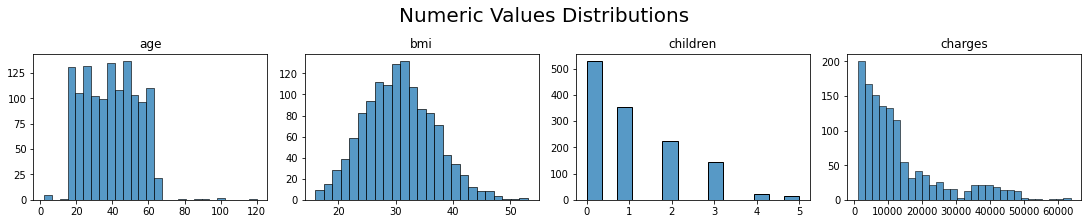

In [891]:
vis_distributions(len(numeric_columns_names))

> bmi seems to have very obvious outliers, also children shows unexpected values

- Boxplot for another view

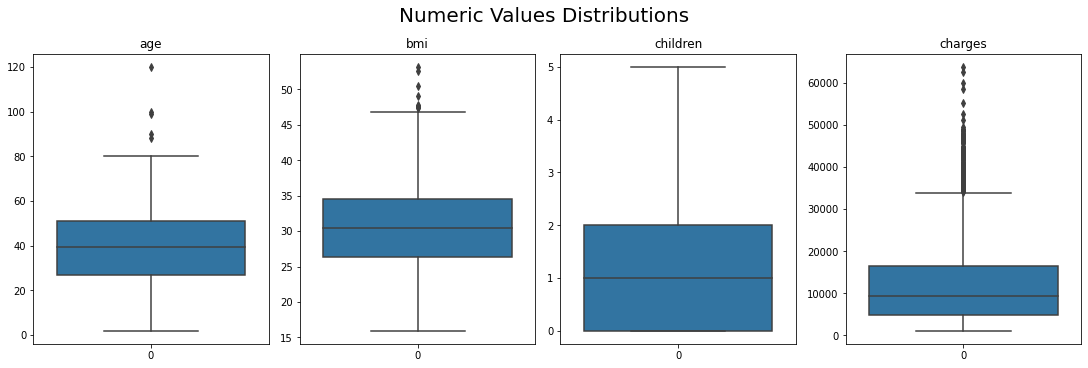

In [892]:
vis_distributions(len(numeric_columns_names), kind="boxplot")


- investigate outliers more for all columns

In [811]:
df[numeric_columns_names].quantile([0.05, 0.985]).transpose()

,0.050,0.985
age,18.0000,64.00000
bmi,20.8000,46.14335
children,0.0000,4.00000
charges,1749.3022,47297.96625


- Decide what are our upper and lower thresholds

In [812]:
df[df.bmi > df.bmi.quantile(0.985)].reset_index(drop=True).sort_values("bmi")

,age,sex,bmi,children,smoker,region,charges
8,43.000000,female,46.20,0.000000,yes,southeast,45863.20500
9,37.000000,male,46.53,3.000000,no,southeast,6435.62370
5,32.000000,male,46.53,2.000000,no,southeast,4686.38870
14,39.276018,male,46.53,1.000000,no,southeast,2927.06470
7,54.000000,female,46.70,2.000000,no,southwest,11538.42100
4,52.000000,female,46.75,5.000000,no,southeast,12592.53450
6,54.000000,female,47.41,0.000000,yes,southeast,63770.42801
3,47.000000,male,47.52,1.000000,no,southeast,8083.91980
11,37.000000,female,47.60,2.000000,yes,southwest,46113.51100
16,52.000000,male,47.74,1.000000,no,southeast,9748.91060


In [813]:
df.drop(df[df.bmi > 55].index, inplace=True)

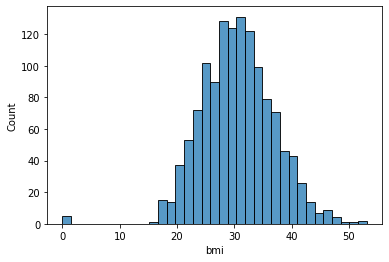

In [814]:
sns.histplot(df.bmi);

In [815]:
df.drop(df[df.bmi < 10].index, inplace=True)

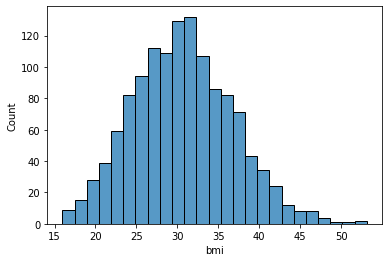

In [816]:
sns.histplot(df.bmi);

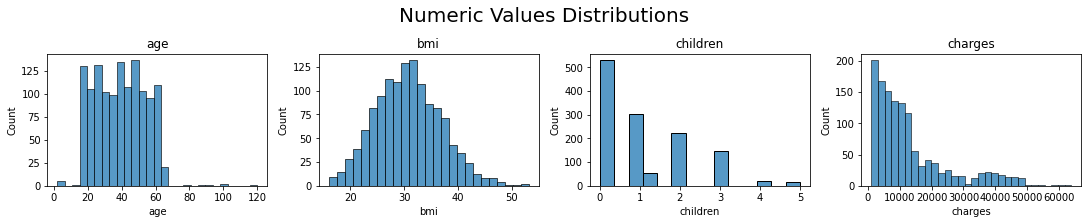

In [817]:
vis_distributions(len(numeric_columns_names))

> Check for weird values in children column

In [818]:
df.children.unique().tolist()

[0.0, 1.0, 3.0, 2.0, 5.0, 4.0, 1.087869362363919]

In [819]:
weird_values_index = ~df.children.apply(float.is_integer)
df[weird_values_index].head()

,age,sex,bmi,children,smoker,region,charges
274,25.0,male,27.550000,1.087869,no,northwest,2523.16950
275,47.0,female,26.600000,1.087869,no,northeast,9715.84100
276,19.0,male,20.615000,1.087869,no,northwest,2803.69785
277,22.0,female,24.300000,1.087869,no,southwest,2150.46900
278,59.0,male,31.074561,1.087869,no,southeast,12928.79110


- Convert children column to integer type to avoid weird values

In [820]:
df["children"] = df.children.astype("int")

- Check data after removing weird values

In [821]:
df.children.unique().tolist()

[0, 1, 3, 2, 5, 4]

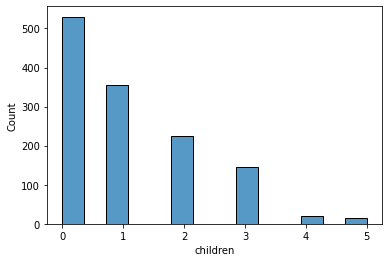

In [822]:
sns.histplot(df.children);

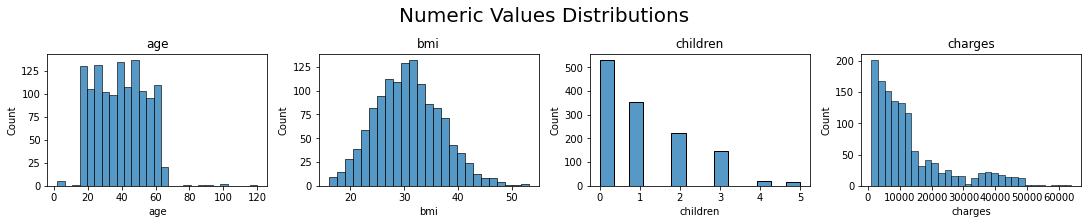

In [823]:
vis_distributions(len(numeric_columns_names))

______